In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.datasets import mnist
import os
print(os.listdir("../input"))
from keras.utils import np_utils
# Any results you write to the current directory are saved as output.

[]


In [2]:
(xtrain,ytrain),(xvalid,yvalid)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [36]:
xtrain1=xtrain.astype('float32')/255
xvalid1=xvalid.astype('float32')/255


In [38]:
ytrain1=np_utils.to_categorical(ytrain,10)
yvalid1=np_utils.to_categorical(yvalid,10)

In [3]:
lr=0.001
train_steps=10000
batch_size=128
disp_step=200

In [8]:
n_input=28
n_steps=28
n_lstm=256
num_classes=10
X=tf.placeholder(tf.float32,shape=[None,n_steps,n_input])
Y=tf.placeholder(tf.float32,shape=[None,num_classes])

In [26]:
W=tf.Variable(tf.random.truncated_normal(shape=[2*n_lstm,num_classes]),dtype=tf.float32)
b=tf.Variable(tf.random.truncated_normal(shape=[num_classes,]))

#pay attention to shape of W cuz forward and backward hidden states of LSTM are concatenated

In [27]:
x=tf.unstack(X,axis=1)
lstm_fw=tf.nn.rnn_cell.BasicLSTMCell(num_units=n_lstm,forget_bias=1.0)
lstm_bw=tf.nn.rnn_cell.BasicLSTMCell(num_units=n_lstm,forget_bias=1.0)


In [28]:
outputs,out_state_fw,out_state_bw=tf.contrib.rnn.static_bidirectional_rnn(lstm_fw,lstm_bw,x,dtype=tf.float32)


ValueError: Variable bidirectional_rnn/fw/basic_lstm_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-11-3509b818631f>", line 1, in <module>
    outputs,out_state_fw,out_state_bw=tf.contrib.rnn.static_bidirectional_rnn(lstm_fw,lstm_bw,x,dtype=tf.float32)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):


In [29]:
print(type(outputs))
print(len(outputs))   # each elemenr is of one time stamp across batch
outputs[0]     # so output states of forward and backward are getting concatenated

<class 'list'>
28


<tf.Tensor 'concat:0' shape=(?, 512) dtype=float32>

In [18]:
print(type(out_state_bw))
print(out_state_bw)

<class 'tensorflow.python.ops.rnn_cell_impl.LSTMStateTuple'>
LSTMStateTuple(c=<tf.Tensor 'bidirectional_rnn/bw/bw/basic_lstm_cell/Add_55:0' shape=(?, 256) dtype=float32>, h=<tf.Tensor 'bidirectional_rnn/bw/bw/basic_lstm_cell/Mul_83:0' shape=(?, 256) dtype=float32>)


In [22]:
#out_state_fw is final state of forward LSTM forward network
#out_state_bw is final state of backward LSTM forward network

In [30]:
logits=tf.matmul(outputs[-1],W)+b
pred=tf.nn.softmax(logits)

In [32]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=pred))
optimizer=tf.train.AdamOptimizer(learning_rate=lr)
train_op=optimizer.minimize(loss)

In [31]:
pred.get_shape()

TensorShape([Dimension(None), Dimension(10)])

In [35]:
correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
init=tf.global_variables_initializer()

In [39]:
train_loss=[]
train_acc=[]
valid_loss=[]
valid_acc=[]
with tf.Session() as s:
    s.run(init)
    for i in range(train_steps):
        randint=np.random.choice(len(xtrain1),batch_size)
        batch_x=xtrain1[randint]
        batch_y=ytrain1[randint]
        feed_dict={X:batch_x,Y:batch_y}
        s.run(train_op,feed_dict=feed_dict)
        
        if((i+1)% disp_step)==0:
            trainloss,trainacc=s.run([loss,accuracy],feed_dict={X:xtrain1,Y:ytrain1})
            train_loss.append(trainloss)
            train_acc.append(trainacc)
            print("step :",i+1," trainloss:",trainloss," trainacc:",trainacc)
            validloss,validacc=s.run([loss,accuracy],feed_dict={X:xvalid1,Y:yvalid1})
            print("step :",i+1," validloss:",validloss," validacc:",validacc)
            valid_loss.append(validloss)
            valid_acc.append(validacc)

step : 200  trainloss: 1.593668  trainacc: 0.8692833
step : 200  validloss: 1.5891975  validacc: 0.8733
step : 400  trainloss: 1.5290772  trainacc: 0.93263334
step : 400  validloss: 1.5268254  validacc: 0.934
step : 600  trainloss: 1.5279655  trainacc: 0.933
step : 600  validloss: 1.5267293  validacc: 0.9341
step : 800  trainloss: 1.5348634  trainacc: 0.92728335
step : 800  validloss: 1.5322002  validacc: 0.9288
step : 1000  trainloss: 1.5235118  trainacc: 0.9379333
step : 1000  validloss: 1.5193338  validacc: 0.943
step : 1200  trainloss: 1.4972326  trainacc: 0.9640333
step : 1200  validloss: 1.4982046  validacc: 0.9631
step : 1400  trainloss: 1.5015429  trainacc: 0.9594667
step : 1400  validloss: 1.5008445  validacc: 0.9604
step : 1600  trainloss: 1.5010642  trainacc: 0.96028334
step : 1600  validloss: 1.5021293  validacc: 0.9592
step : 1800  trainloss: 1.498672  trainacc: 0.96243334
step : 1800  validloss: 1.4983028  validacc: 0.9632
step : 2000  trainloss: 1.4914286  trainacc: 0.96

In [41]:
import matplotlib.pyplot as plt

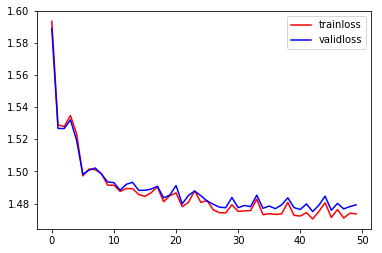

In [44]:
plt.plot(train_loss,'r',label='trainloss')
plt.plot(valid_loss,'b',label='validloss')
plt.legend()

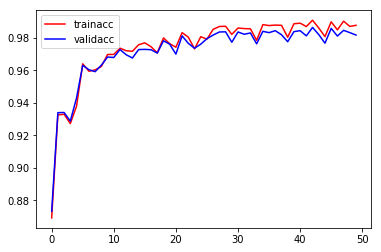

In [45]:
plt.plot(train_acc,'r',label='trainacc')
plt.plot(valid_acc,'b',label='validacc')
plt.legend()

In [ ]:
#Clearly bidrectional LSTM performs much better than vanilla LSTM
#pay attention to comments in this as they are really helpfull and gives a good insight into things